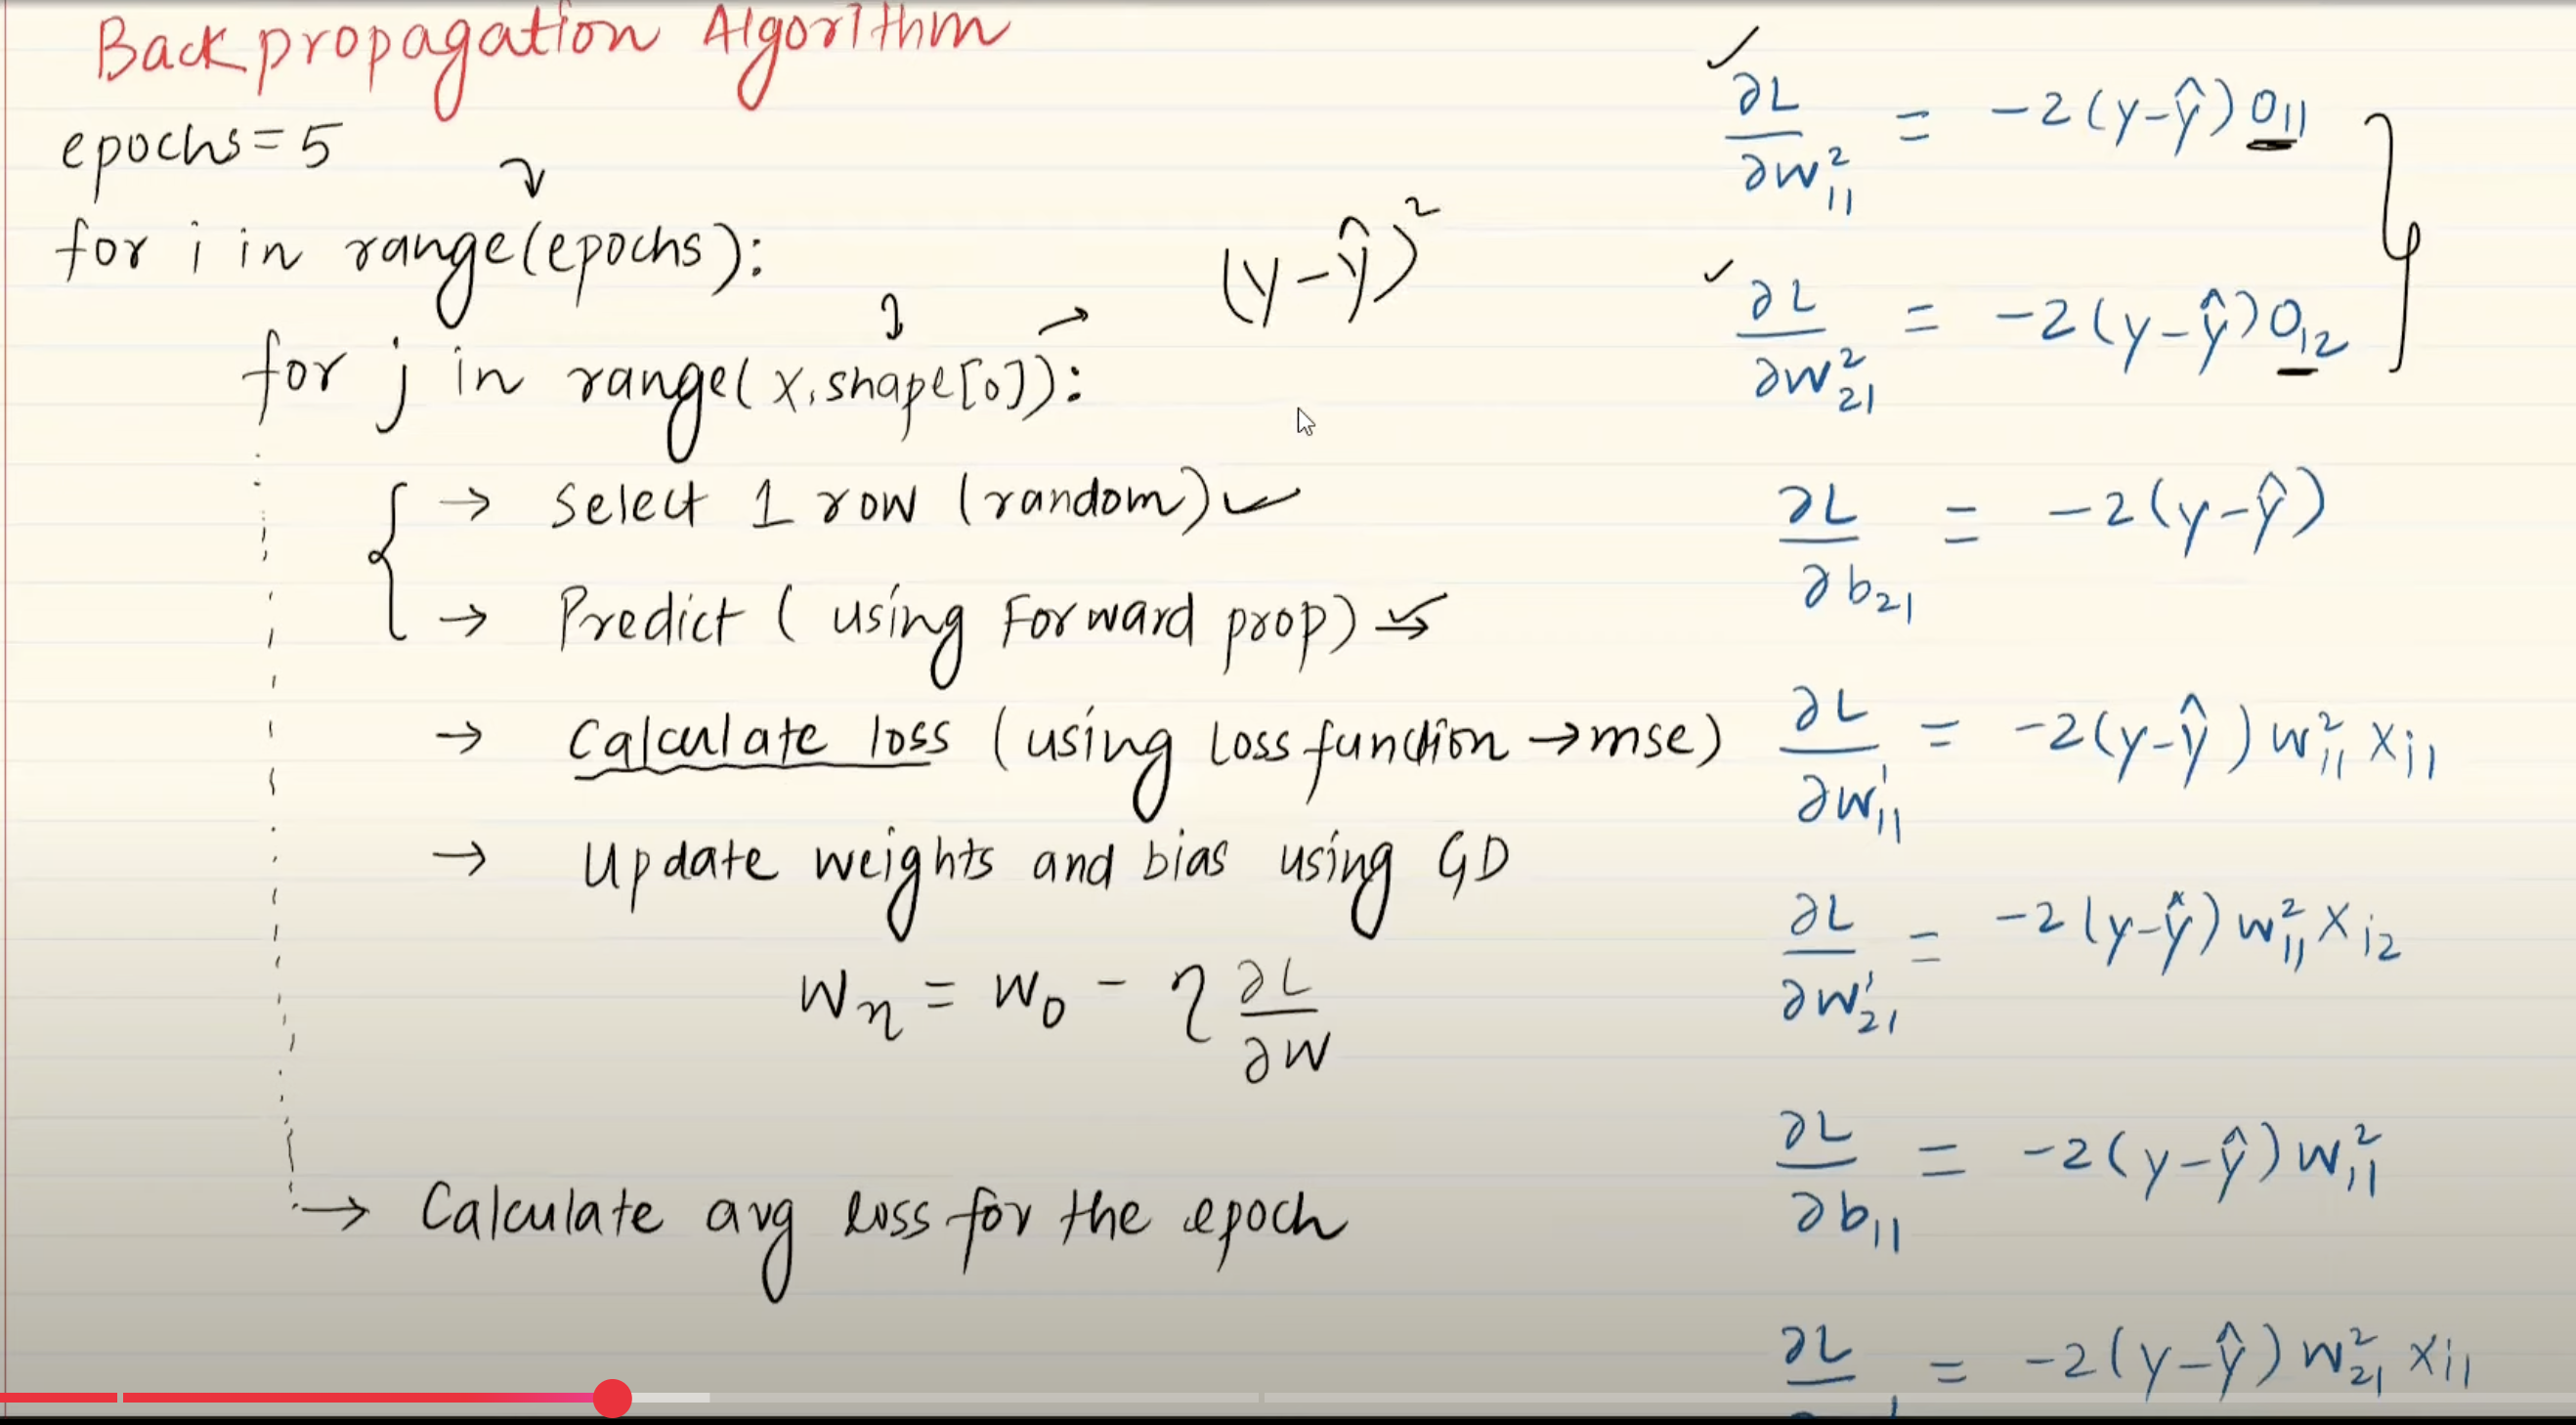

In [107]:
import numpy as np
import pandas as pd

In [108]:
df = pd.read_csv('placement.csv')

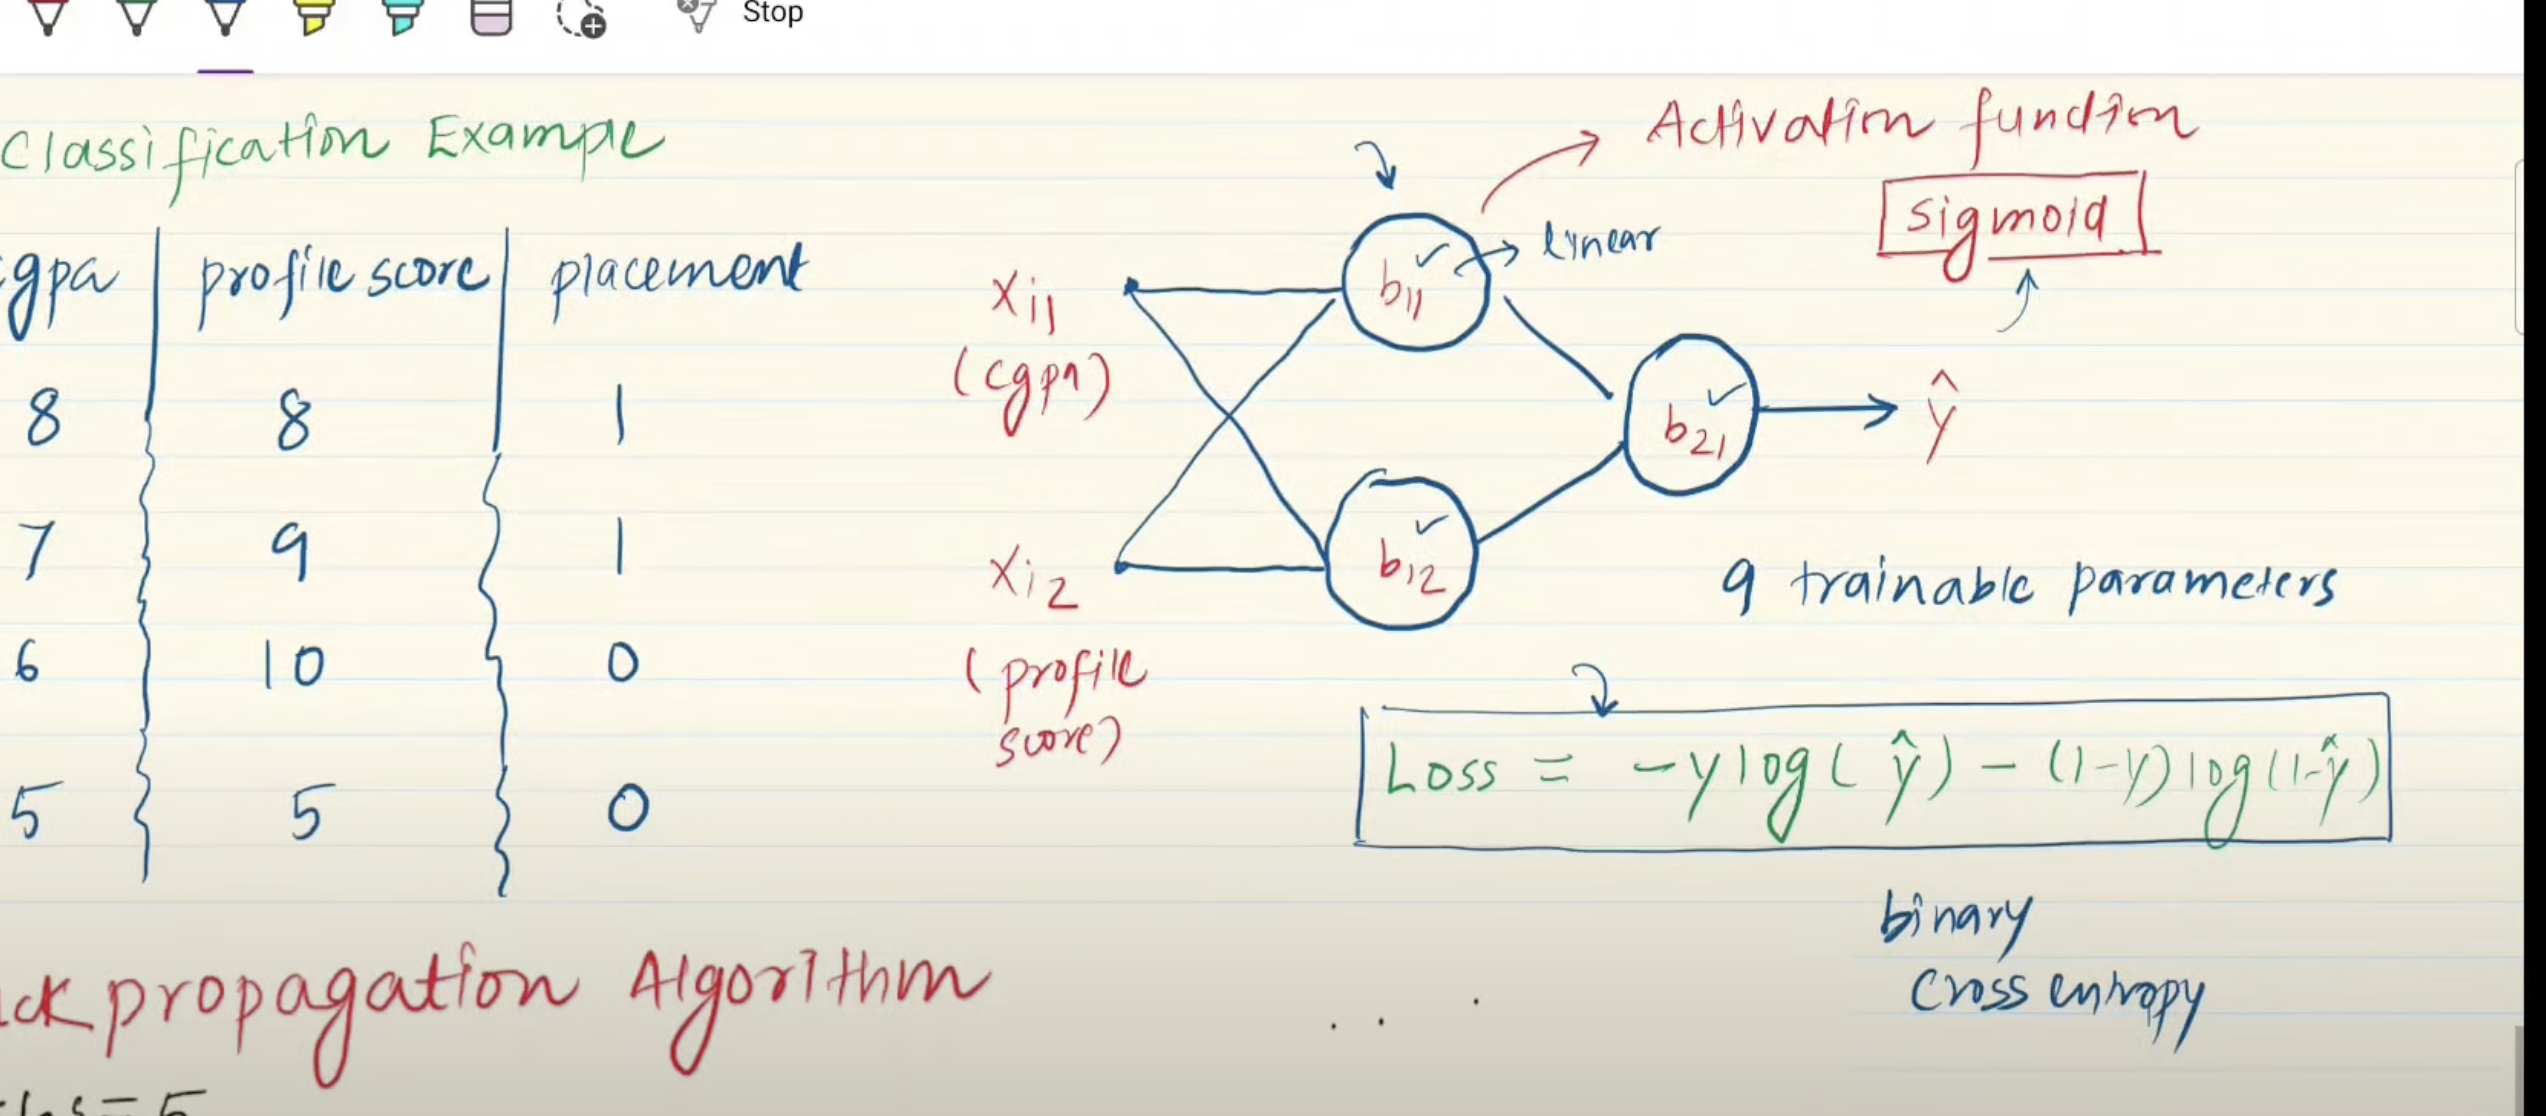

In [109]:
df

cgpa  resume_score  placed
0   8.14          6.52       1
1   6.17          5.17       0
2   8.27          8.86       1
3   6.88          7.27       1
4   7.52          7.30       1
..   ...           ...     ...
95  6.33          6.38       0
96  8.23          7.76       1
97  6.65          7.78       0
98  8.14          5.63       1
99  6.09          6.61       0

[100 rows x 3 columns]

In [110]:
def initialize_parameters(layer_dims):
  
  np.random.seed(3)
  parameters = {}
  L = len(layer_dims)         

  for l in range(1, L):
    # Initialize with random values instead of fixed 0.1
    parameters['W' + str(l)] = np.random.randn(layer_dims[l-1], layer_dims[l]) * 0.01
    parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
      
  return parameters

In [111]:
# Utility Functions
def sigmoid(Z):
  
  A = 1/(1+np.exp(-Z))

  return A

In [112]:
def linear_forward(A_prev, W, b):
  
  Z = np.dot(W.T, A_prev) + b

  A = sigmoid(Z)
  
  return A

In [113]:
# L-layer feed forward

def L_layer_forward(X, parameters):

  A = X
  L = len(parameters) // 2                  # number of layers in the neural network
  
  for l in range(1, L+1):
    A_prev = A 
    Wl = parameters['W' + str(l)]
    bl = parameters['b' + str(l)]
    #print("A"+str(l-1)+": ", A_prev)
    #print("W"+str(l)+": ", Wl)
    #print("b"+str(l)+": ", bl)
    #print("--"*20)

    A = linear_forward(A_prev, Wl, bl)
    #print("A"+str(l)+": ", A)
    #print("**"*20)
          
  return A,A_prev


### A[0] is the input layer input, A[1] is the hiddden layer input and A[2] is the output layer value which then will pass through activation

In [114]:
def update_parameters(parameters, y, y_hat, A1, X):
    learning_rate = 0.001

    # Compute the output layer error
    dZ2 = y - y_hat  # scalar
    dW2_0 = dZ2 * A1[0][0]
    dW2_1 = dZ2 * A1[1][0]
    db2 = dZ2

    # Compute the hidden layer error
    dA1_0 = dZ2 * parameters['W2'][0][0]
    dA1_1 = dZ2 * parameters['W2'][1][0]
    dZ1_0 = dA1_0 * A1[0][0] * (1 - A1[0][0])
    dZ1_1 = dA1_1 * A1[1][0] * (1 - A1[1][0])

    dW1_00 = dZ1_0 * X[0][0]
    dW1_01 = dZ1_0 * X[1][0]
    db1_0 = dZ1_0

    dW1_10 = dZ1_1 * X[0][0]
    dW1_11 = dZ1_1 * X[1][0]
    db1_1 = dZ1_1

    # Update weights and biases
    parameters['W2'][0][0] += learning_rate * dW2_0
    parameters['W2'][1][0] += learning_rate * dW2_1
    parameters['b2'][0][0] += learning_rate * db2

    parameters['W1'][0][0] += learning_rate * dW1_00
    parameters['W1'][0][1] += learning_rate * dW1_01
    parameters['b1'][0][0] += learning_rate * db1_0

    parameters['W1'][1][0] += learning_rate * dW1_10
    parameters['W1'][1][1] += learning_rate * dW1_11
    parameters['b1'][1][0] += learning_rate * db1_1

In [115]:
# epochs implementation

parameters = initialize_parameters([2,2,1])
epochs = 50

for i in range(epochs):

  Loss = []

  for j in range(df.shape[0]):

    X = df[['cgpa', 'resume_score']].values[j].reshape(2,1) # Shape(no of features, no. of training example)
    y = df[['placed']].values[j][0]

    # Parameter initialization


    y_hat,A1 = L_layer_forward(X,parameters)
    y_hat = y_hat[0][0]

    update_parameters(parameters,y,y_hat,A1,X)

    Loss.append(-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

  print('Epoch - ',i+1,'Loss - ',np.array(Loss).mean())

parameters

Epoch -  1 Loss -  0.6933429682990028
Epoch -  2 Loss -  0.6933422746545657
Epoch -  3 Loss -  0.6933416041358019
Epoch -  4 Loss -  0.6933409550744345
Epoch -  5 Loss -  0.6933403259129323
Epoch -  6 Loss -  0.6933397151961835
Epoch -  7 Loss -  0.6933391215637998
Epoch -  8 Loss -  0.6933385437429994
Epoch -  9 Loss -  0.6933379805420291
Epoch -  10 Loss -  0.6933374308440807
Epoch -  11 Loss -  0.6933368936016625
Epoch -  12 Loss -  0.6933363678313941
Epoch -  13 Loss -  0.6933358526091905
Epoch -  14 Loss -  0.6933353470658012
Epoch -  15 Loss -  0.6933348503826857
Epoch -  16 Loss -  0.6933343617881921
Epoch -  17 Loss -  0.6933338805540167
Epoch -  18 Loss -  0.693333405991929
Epoch -  19 Loss -  0.6933329374507315
Epoch -  20 Loss -  0.6933324743134476
Epoch -  21 Loss -  0.6933320159947095
Epoch -  22 Loss -  0.6933315619383411
Epoch -  23 Loss -  0.6933311116151117
Epoch -  24 Loss -  0.693330664520654
Epoch -  25 Loss -  0.6933302201735312
Epoch -  26 Loss -  0.69332977811344

{'W1': array([[ 0.01910038,  0.00400568],
        [-0.00116091, -0.01934528]]),
 'b1': array([[-8.96600411e-05],
        [-7.30421366e-05]]),
 'W2': array([[ 0.00733083],
        [-0.00328417]]),
 'b2': array([[-0.00146143]])}

In [116]:
parameters

{'W1': array([[ 0.01910038,  0.00400568],
        [-0.00116091, -0.01934528]]),
 'b1': array([[-8.96600411e-05],
        [-7.30421366e-05]]),
 'W2': array([[ 0.00733083],
        [-0.00328417]]),
 'b2': array([[-0.00146143]])}

In [120]:
#create predict function with trained parameters and activation of sigmoid
def predict(X, parameters):
  A, _ = L_layer_forward(X, parameters)
  # Extract the scalar value and apply threshold
  return 1 if A[0][0] >= 0.5 else 0
  # return 1 if A[0][0] >= threshold else 0
  return A
#Prediction for first row
predict(df[['cgpa', 'resume_score']].values[3].reshape(2,1), parameters)


1

In [121]:
#Create a Dataframe with old df and append new predictions to it
prediction = pd.DataFrame()
prediction['cgpa'] = df['cgpa']
prediction['resume_score'] = df['resume_score']
prediction['real'] = df['placed']
prediction['probability'] = df.apply(lambda row: get_probability(row[['cgpa', 'resume_score']].values.reshape(2,1), parameters), axis=1)
prediction['predicted'] = df.apply(lambda row: predict(row[['cgpa', 'resume_score']].values.reshape(2,1), parameters), axis=1)


In [122]:
prediction

cgpa  resume_score  real  probability  predicted
0   8.14          6.52     1     0.500227          1
1   6.17          5.17     0     0.500207          1
2   8.27          8.86     1     0.500236          1
3   6.88          7.27     1     0.500220          1
4   7.52          7.30     1     0.500225          1
..   ...           ...   ...          ...        ...
95  6.33          6.38     0     0.500213          1
96  8.23          7.76     1     0.500232          1
97  6.65          7.78     0     0.500220          1
98  8.14          5.63     1     0.500224          1
99  6.09          6.61     0     0.500211          1

[100 rows x 5 columns]

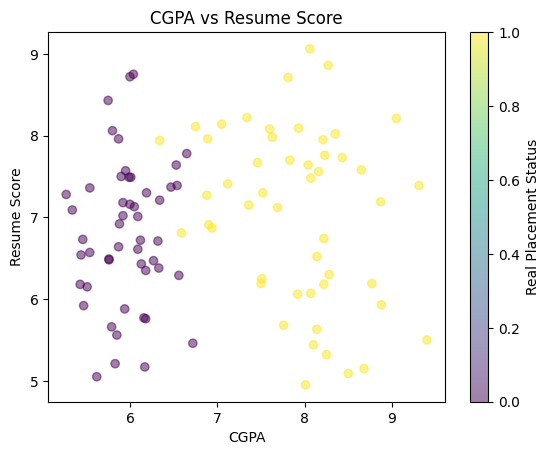

In [123]:
#scatter plot of cgpa vs resume_score colored by real
import matplotlib.pyplot as plt
plt.scatter(prediction['cgpa'], prediction['resume_score'], c=prediction['real'],
            cmap='viridis', alpha=0.5)
plt.xlabel('CGPA')
plt.ylabel('Resume Score')
plt.title('CGPA vs Resume Score')
plt.colorbar(label='Real Placement Status')
plt.show()